In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import itertools
from collections import defaultdict, Counter
# pd.read_csv('/Users/admin/Desktop/HMG/ws/Mission/W2/data.csv')
data = pd.read_csv('/Users/admin/Desktop/HMG/ws/Mission/W2/data.csv', sep=',', encoding='latin-1', on_bad_lines='skip')

In [148]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [149]:
data.columns = ['target_sentiment', 'ID', 'timestamp', 'query_flag', 'username', 'text']

<Axes: >

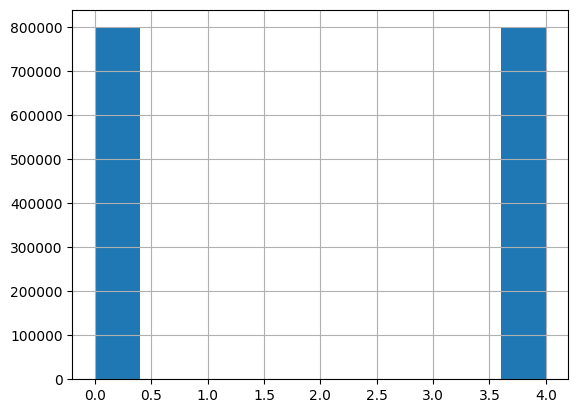

In [150]:
data['target_sentiment'].hist()

In [151]:
data.loc[data.query_flag != "NO_QUERY"]

,target_sentiment,ID,timestamp,query_flag,username,text


# Summary
- 모든 데이터는 negative or positive이며, 이는 sentence 단위로 labeling 된 결과이다.
- 단어에 대한 sentiment는 어떻게 구할 수 있나?

In [152]:
def processing(x):    
    return x.split(' ')

In [153]:
positive_words_series = data.text.loc[data.target_sentiment==0].apply(processing)
positive_words_2d = positive_words_series.to_list()
positive_words = list(itertools.chain(*positive_words_2d))

In [154]:
negative_words_series = data.text.loc[data.target_sentiment==4].apply(processing)
negative_words_2d = negative_words_series.to_list()
negative_words = list(itertools.chain(*negative_words_2d))

In [155]:
positive_counts = Counter(positive_words)
positive_tags = positive_counts.most_common(200) 
positive_dict = dict(positive_tags)

negative_counts = Counter(negative_words)
negative_tags = negative_counts.most_common(200) 
negative_dict = dict(negative_counts)

In [156]:
positive_dict

{'': 959143,
 'to': 306517,
 'I': 299816,
 'the': 240999,
 'a': 175823,
 'my': 166917,
 'i': 160102,
 'and': 140240,
 'is': 118125,
 'in': 108421,
 'for': 96297,
 'it': 91087,
 'of': 90913,
 'have': 77876,
 'on': 77565,
 'you': 75488,
 'so': 72737,
 'me': 69347,
 'but': 68266,
 'that': 61908,
 'not': 61387,
 'at': 57353,
 'be': 56638,
 "I'm": 56195,
 'was': 56131,
 'just': 49970,
 'with': 48214,
 'get': 44107,
 'this': 43612,
 'go': 40268,
 'up': 39171,
 'like': 38635,
 'out': 36238,
 'no': 36004,
 'all': 34930,
 'work': 32855,
 'are': 31865,
 'now': 30993,
 'got': 29524,
 'do': 29434,
 'going': 28967,
 "don't": 28903,
 'miss': 28401,
 'want': 27983,
 'from': 27233,
 'day': 26761,
 'really': 26754,
 "can't": 26290,
 'back': 25908,
 '-': 24918,
 'too': 24887,
 'am': 24662,
 'about': 24563,
 'had': 24532,
 'still': 23406,
 'im': 23121,
 "it's": 23110,
 'one': 21361,
 'know': 20947,
 'feel': 20485,
 '2': 20424,
 'will': 20413,
 'when': 20350,
 'its': 20304,
 'good': 20129,
 'think': 19978

In [157]:
intersect_words = list(set(positive_dict.keys())&set(negative_dict.keys()))
intersect_words

['',
 'there',
 'right',
 'was',
 'being',
 'love',
 'off',
 'about',
 'should',
 'much',
 'me.',
 'after',
 "didn't",
 'then',
 'school',
 'not',
 'well',
 'from',
 'they',
 'good',
 'sleep',
 "won't",
 'had',
 'like',
 "doesn't",
 'than',
 'too',
 'night',
 "it's",
 'morning',
 'make',
 'dont',
 'an',
 'me',
 'were',
 'so',
 'already',
 'them',
 'new',
 'fun',
 'some',
 'her',
 'take',
 'day',
 'in',
 'need',
 'getting',
 'people',
 'know',
 'tired',
 'feel',
 'feeling',
 'see',
 'more',
 'But',
 'im',
 'why',
 'she',
 'last',
 'time',
 'having',
 'wait',
 'today.',
 'back',
 '-',
 'get',
 'will',
 'u',
 'bad',
 'been',
 'wanna',
 'So',
 '&amp;',
 'And',
 'very',
 '.',
 'by',
 'The',
 'hope',
 'because',
 'if',
 'my',
 'I',
 'No',
 'bed',
 'for',
 'My',
 'over',
 'on',
 "don't",
 'sad',
 'lost',
 'his',
 'am',
 '...',
 'him',
 'at',
 'now',
 'or',
 "I'm",
 'sorry',
 'before',
 "I'll",
 'its',
 'gonna',
 '3',
 'your',
 'one',
 'now.',
 'we',
 'went',
 '4',
 'our',
 'watch',
 'It',
 "i

In [163]:
print(intersect_words)
for word in intersect_words:
    try:
        if positive_dict[word] > 10000 and negative_dict[word] > 10000:
            positive_dict.pop(word)
            negative_dict.pop(word)       
    except:
        pass

['', 'there', 'right', 'was', 'being', 'love', 'off', 'about', 'should', 'much', 'me.', 'after', "didn't", 'then', 'school', 'not', 'well', 'from', 'they', 'good', 'sleep', "won't", 'had', 'like', "doesn't", 'than', 'too', 'night', "it's", 'morning', 'make', 'dont', 'an', 'me', 'were', 'so', 'already', 'them', 'new', 'fun', 'some', 'her', 'take', 'day', 'in', 'need', 'getting', 'people', 'know', 'tired', 'feel', 'feeling', 'see', 'more', 'But', 'im', 'why', 'she', 'last', 'time', 'having', 'wait', 'today.', 'back', '-', 'get', 'will', 'u', 'bad', 'been', 'wanna', 'So', '&amp;', 'And', 'very', '.', 'by', 'The', 'hope', 'because', 'if', 'my', 'I', 'No', 'bed', 'for', 'My', 'over', 'on', "don't", 'sad', 'lost', 'his', 'am', '...', 'him', 'at', 'now', 'or', "I'm", 'sorry', 'before', "I'll", 'its', 'gonna', '3', 'your', 'one', 'now.', 'we', 'went', '4', 'our', 'watch', 'It', "i'm", 'with', 'do', "can't", 'Oh', 'a', 'hours', 'only', 'way', 'he', 'would', 'days', 'lol', 'tomorrow', 'miss', 'n

In [164]:
positive_dict.keys()

dict_keys(['miss', 'feel', 'My', 'sad', 'wish', 'bad', 'only', 'hate', "didn't", 'he', 'could', 'why', 'sleep', 'sorry', 'right', 'gonna', 'getting', 'dont', 'even', 'over', 'wanna', 'she', 'tomorrow', 'come', 'cant', 'did', 'But', 'oh', 'sick', 'never', 'were', 'way', 'them', 'again', 'being', 'So', 'No', 'find', 'down', 'It', '...', 'school', 'feeling', 'after', "I've", 'next', 'And', 'him', 'though', 'should', 'people', 'because', 'any', 'take', 'his', 'working', '4', 'week', 'little', 'Oh', 'having', 'bed', 'better', '3', "won't", 'long', 'Not', 'days', 'missed', 'it.', 'tired', "I'll", 'phone', 'lost', "doesn't", 'morning', '.', 'twitter', 'than', 'watch', 'left', 'went', 'today.', 'wait', 'tonight', 'doing', 'already', 'hours', 'another', 'before', 'fun', 'me.', 'now.', 'our'])

In [165]:
wc = WordCloud(background_color="white", max_font_size=60)
positive_cloud = wc.generate_from_frequencies(positive_dict)


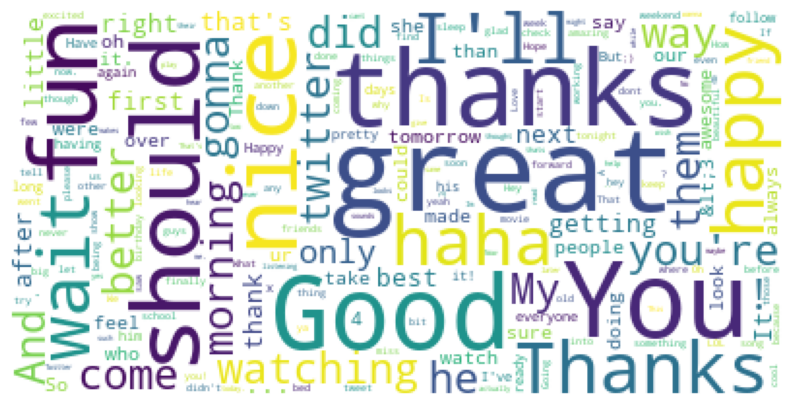

In [166]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(positive_cloud)
plt.show()

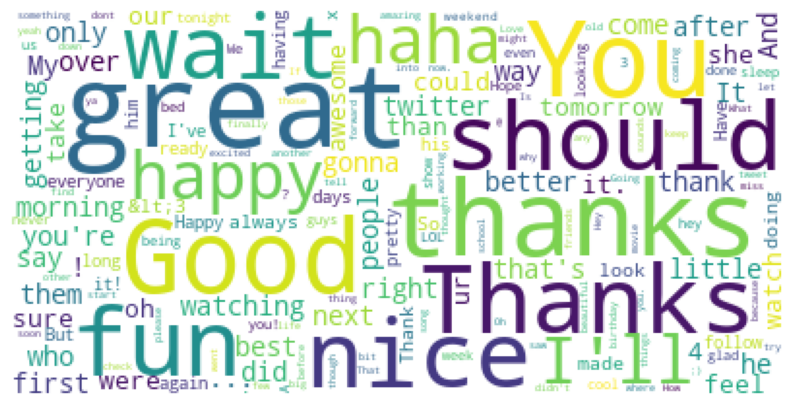

In [168]:
negative_cloud = wc.generate_from_frequencies(negative_dict)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(negative_cloud)
plt.show()